# 6.3 Geographical Visualizations with Python

### This script contains the following:

#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth
#### 5. Questions
#### 6. Extra Visuals

## 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'D:\Users\Marlo\OneDrive\OneDrive - South Washington County Schools\Home\job support\Coursework\Achievement 6\Disability Statistics\03 Scripts\us-states.json'

In [4]:
#Import Data
path = r"D:\Users\Marlo\OneDrive\OneDrive - South Washington County Schools\Home\job support\Coursework\Achievement 6\Disability Statistics" 

In [5]:
prev = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Disability Prevalence.csv'))

In [6]:
employ = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Employment & Poverty.csv'))

In [7]:
earn = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'earn2.csv'))

## 2. Data wrangling

In [8]:
prev.columns

Index(['state', 'total_pop', 'disability_category', 'age_group', 'race',
       'gender', 'disability_count', 'percent_of_total',
       'percent_of_disabilities'],
      dtype='object')

In [9]:
employ.columns

Index(['state', 'total_pop', 'disability_category', 'race', 'gender',
       'employed_count', 'disability_employed', 'no_disability_employed',
       'employment_gap', 'poverty_count', 'disability_poverty',
       'no_disability_poverty', 'poverty_gap'],
      dtype='object')

In [10]:
earn.columns

Index(['Unnamed: 0', 'state', 'total_earnings', 'no_disability_earnings',
       'disability_earnings', 'earnings_gap', 'SSDI_allowance_rate',
       'min_wage_rate'],
      dtype='object')

No data wrangling needs to be completed at this time.

## 3. Conduct consistency checks

In [11]:
#Check for missing values
prev.isnull().sum()

state                        0
total_pop                    0
disability_category          0
age_group                    0
race                         0
gender                       0
disability_count            16
percent_of_total            16
percent_of_disabilities    629
dtype: int64

This matches the pervious file. No changes need to be made.

In [12]:
employ.isnull().sum()

state                       0
total_pop                   0
disability_category         0
race                        0
gender                      0
employed_count              4
disability_employed         5
no_disability_employed    306
employment_gap            311
poverty_count               4
disability_poverty          4
no_disability_poverty     306
poverty_gap               310
dtype: int64

This matches the previous file. No changes need to be made.

In [13]:
earn.isnull().sum()

Unnamed: 0                0
state                     0
total_earnings            0
no_disability_earnings    0
disability_earnings       0
earnings_gap              0
SSDI_allowance_rate       0
min_wage_rate             0
dtype: int64

There are no missing values.

##### Duplicates Check

In [14]:
prev_dups = prev.duplicated()

In [15]:
prev_dups.shape

(4030,)

In [16]:
employ_dups = employ.duplicated()
employ_dups.shape

(714,)

In [17]:
earn_dups = earn.duplicated()
earn_dups.shape

(51,)

None of the data sets have duplicates.

##### Extreme Values Check

<Axes: xlabel='percent_of_total', ylabel='Count'>

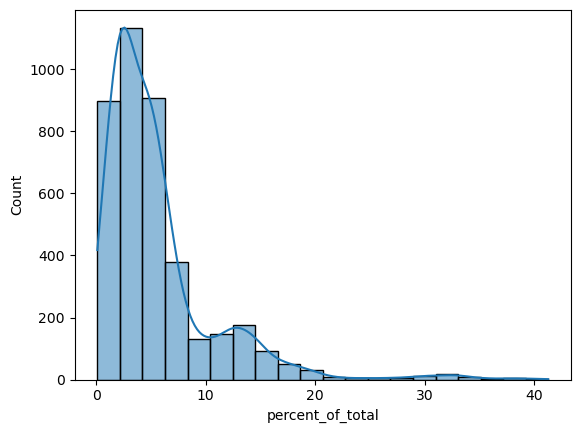

In [18]:
# Check for extreme values in the disability prevalence data set.
sns.histplot(prev['percent_of_total'], bins=20, kde = True)

<Axes: xlabel='percent_of_disabilities', ylabel='Count'>

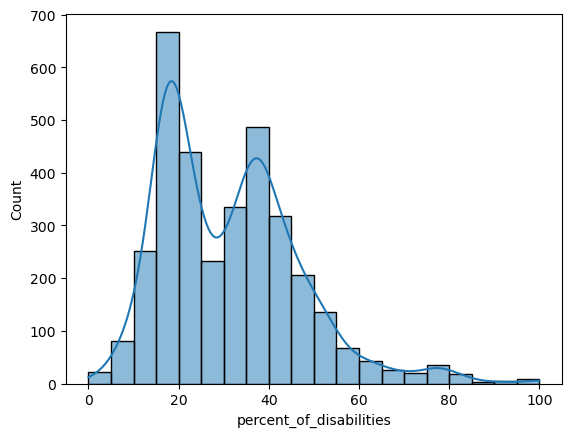

In [19]:
sns.histplot(prev['percent_of_disabilities'], bins=20, kde = True)

<Axes: xlabel='disability_count', ylabel='Count'>

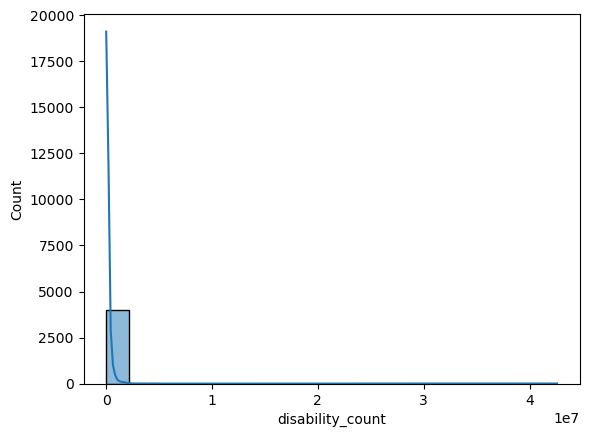

In [20]:
sns.histplot(prev['disability_count'], bins=20, kde = True)

In [21]:
#Check how many extreme values
prev[prev['disability_count']> 10000000]

state  total_pop disability_category age_group race gender  \
0    US  326942778                 All       All  All    All   

   disability_count  percent_of_total  percent_of_disabilities  
0        42601999.0              13.0                      NaN

In [22]:
#Clean extreme values in "disability_count"
prev2 = prev[prev['disability_count']<10000000]

<Axes: xlabel='disability_count', ylabel='Count'>

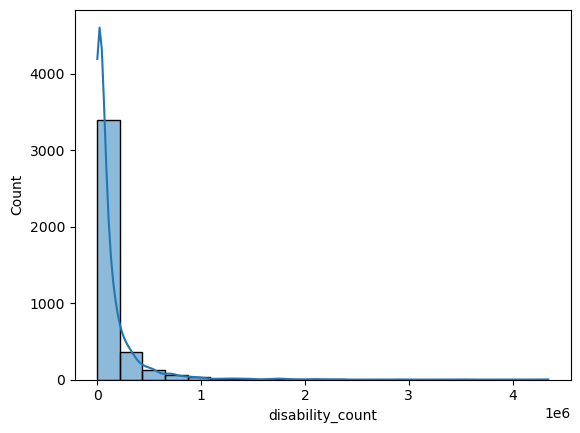

In [23]:
sns.histplot(prev2['disability_count'], bins=20, kde = True)

<Axes: xlabel='gender', ylabel='Count'>

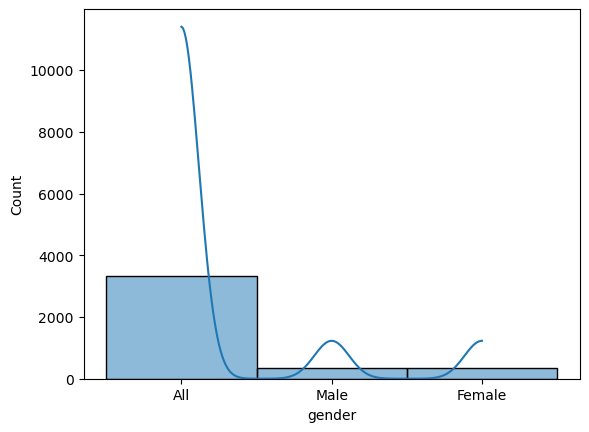

In [24]:
sns.histplot(prev['gender'], bins=20, kde = True)

<Axes: xlabel='age_group', ylabel='Count'>

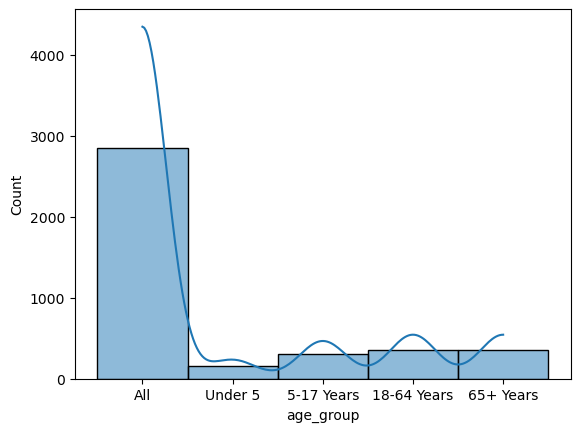

In [25]:
sns.histplot(prev['age_group'], bins=20, kde = True)

<Axes: xlabel='race', ylabel='Count'>

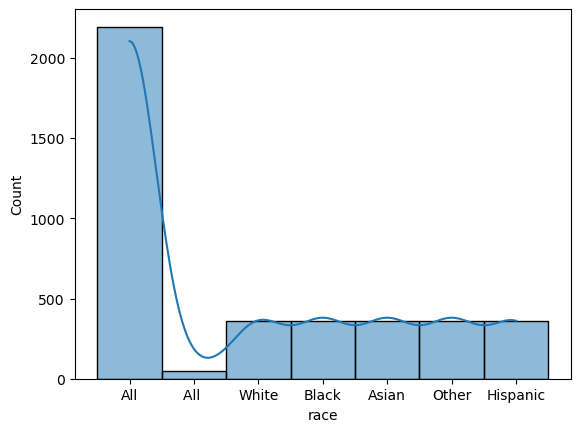

In [26]:
sns.histplot(prev['race'], bins=20, kde = True)

<Axes: xlabel='disability_category', ylabel='Count'>

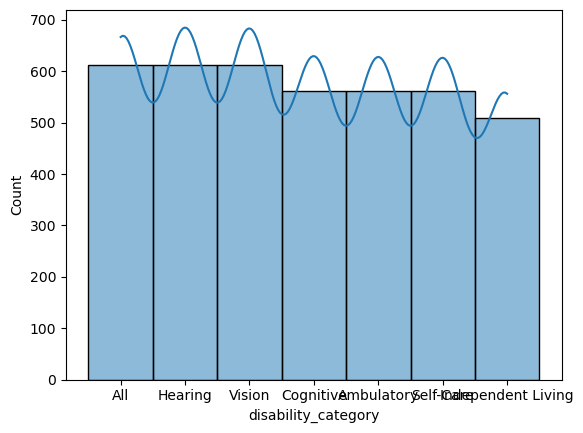

In [27]:
sns.histplot(prev['disability_category'], bins=20, kde = True)

<Axes: xlabel='total_pop', ylabel='Count'>

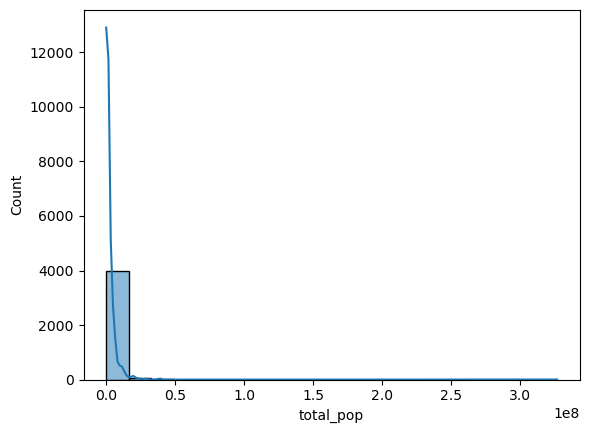

In [28]:
sns.histplot(prev['total_pop'], bins=20, kde = True)

In [29]:
#Check how many extreme values
prev[prev['total_pop']> 100000000]

state  total_pop disability_category age_group race gender  \
0    US  326942778                 All       All  All    All   

   disability_count  percent_of_total  percent_of_disabilities  
0        42601999.0              13.0                      NaN

In [30]:
#Clean extreme values in "disability_count"
prev2 = prev[prev['total_pop']<100000000]

<Axes: xlabel='total_pop', ylabel='Count'>

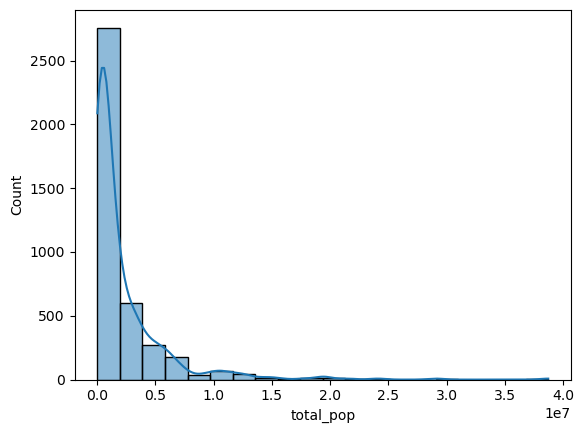

In [31]:
sns.histplot(prev2['total_pop'], bins=20, kde = True)

<Axes: xlabel='total_pop', ylabel='Count'>

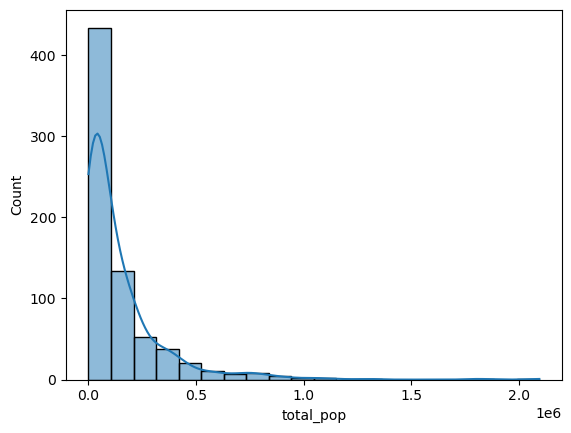

In [32]:
### Check for extreme values in the employment & poverty data set.
sns.histplot(employ['total_pop'], bins=20, kde = True)

<Axes: xlabel='disability_category', ylabel='Count'>

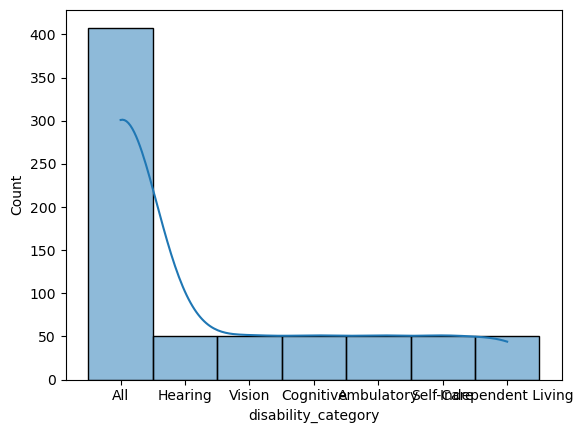

In [33]:
sns.histplot(employ['disability_category'], bins=20, kde = True)

<Axes: xlabel='race', ylabel='Count'>

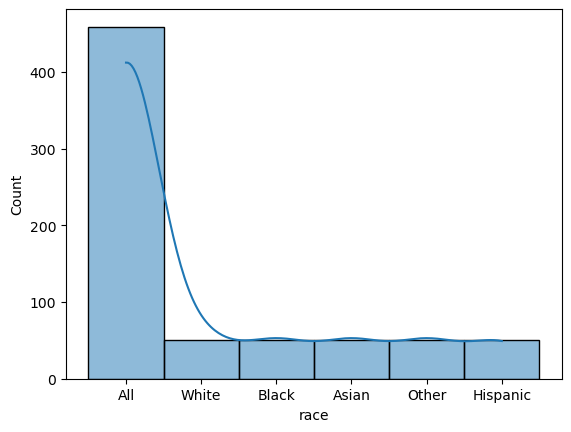

In [34]:
sns.histplot(employ['race'], bins=20, kde = True)

<Axes: xlabel='gender', ylabel='Count'>

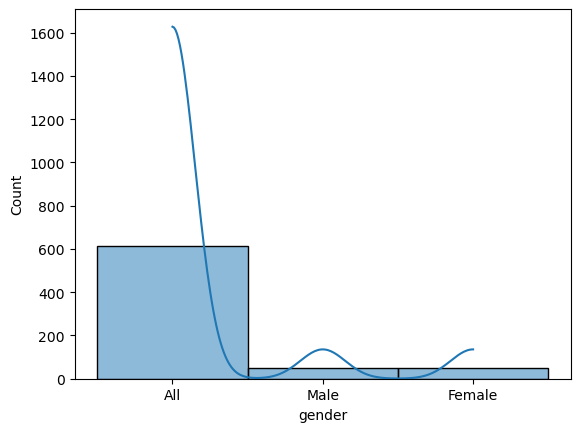

In [35]:
sns.histplot(employ['gender'], bins=20, kde = True)

<Axes: xlabel='employed_count', ylabel='Count'>

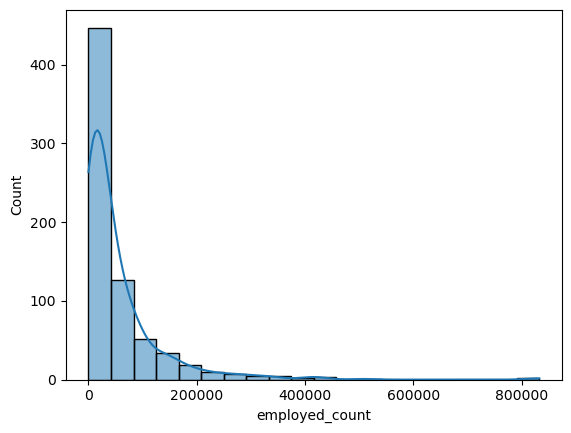

In [36]:
sns.histplot(employ['employed_count'], bins=20, kde = True)

<Axes: xlabel='disability_employed', ylabel='Count'>

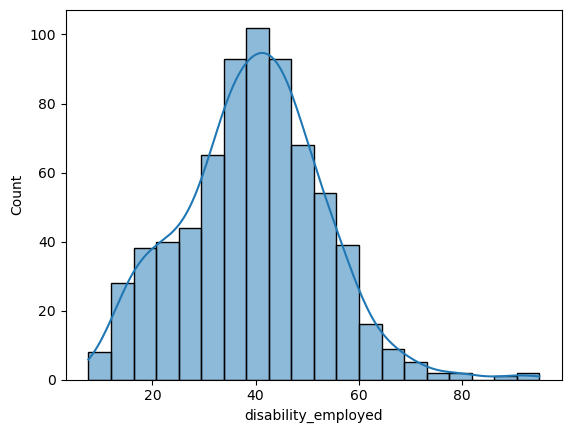

In [37]:
sns.histplot(employ['disability_employed'], bins=20, kde = True)

<Axes: xlabel='no_disability_employed', ylabel='Count'>

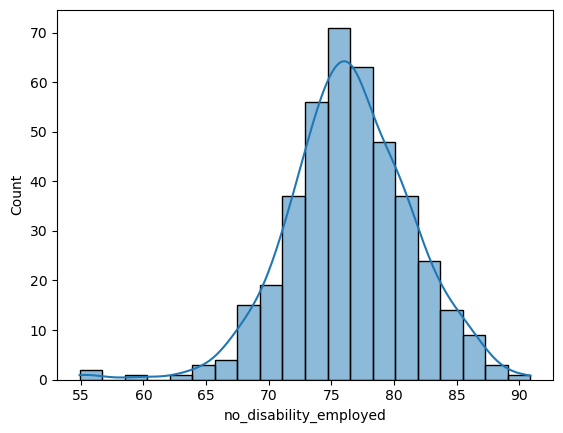

In [38]:
sns.histplot(employ['no_disability_employed'], bins=20, kde = True)

<Axes: xlabel='employment_gap', ylabel='Count'>

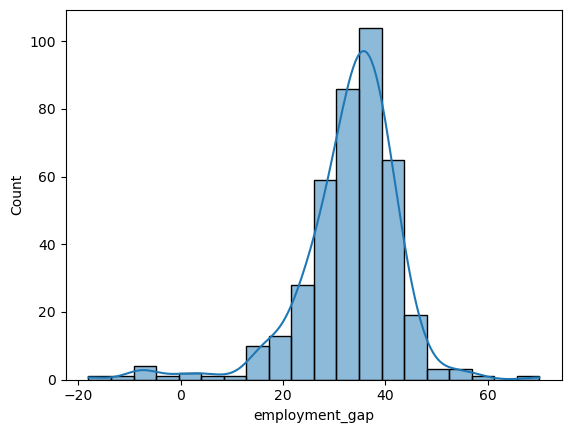

In [39]:
sns.histplot(employ['employment_gap'], bins=20, kde = True)

<Axes: xlabel='poverty_count', ylabel='Count'>

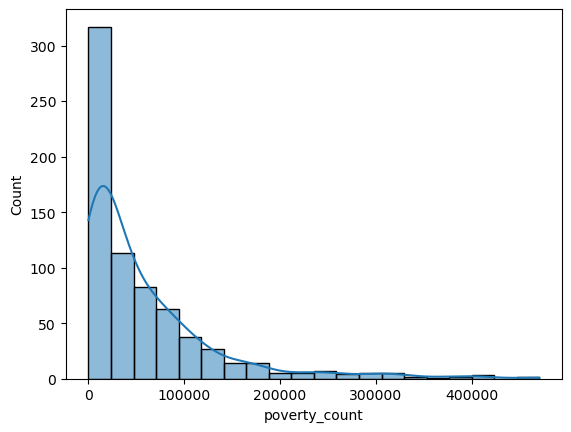

In [40]:
sns.histplot(employ['poverty_count'], bins=20, kde = True)

<Axes: xlabel='disability_poverty', ylabel='Count'>

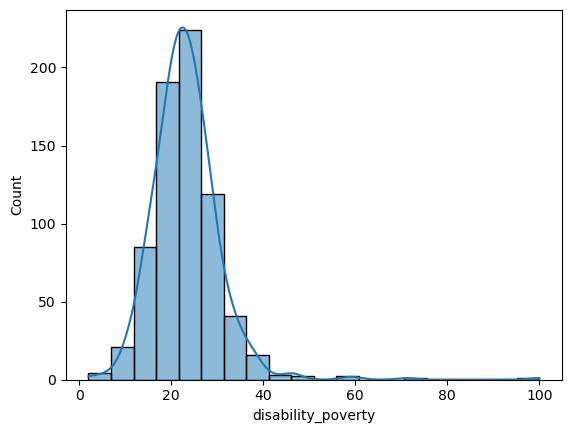

In [41]:
sns.histplot(employ['disability_poverty'], bins=20, kde = True)

<Axes: xlabel='no_disability_poverty', ylabel='Count'>

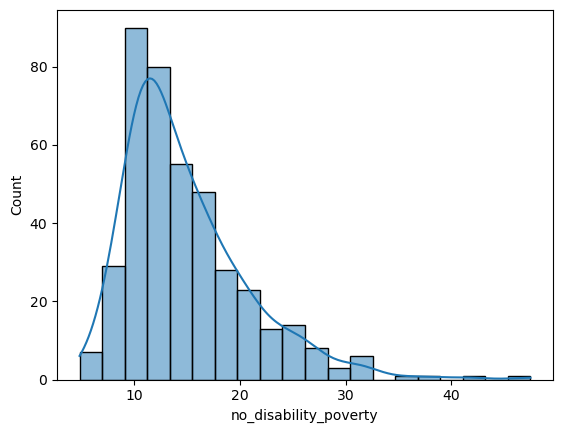

In [42]:
sns.histplot(employ['no_disability_poverty'], bins=20, kde = True)

<Axes: xlabel='poverty_gap', ylabel='Count'>

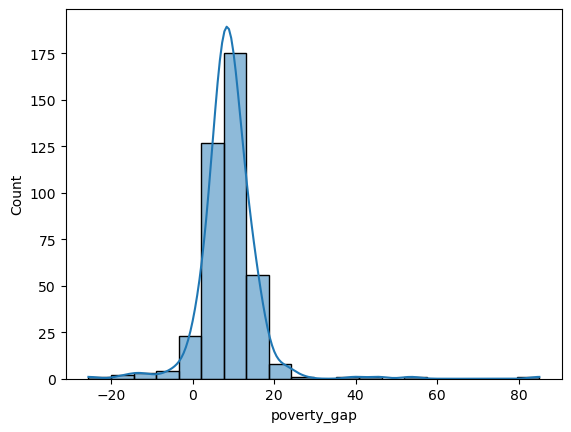

In [43]:
sns.histplot(employ['poverty_gap'], bins=20, kde = True)

There are no extreme values that stick out in these graphs.

<Axes: xlabel='total_earnings', ylabel='Count'>

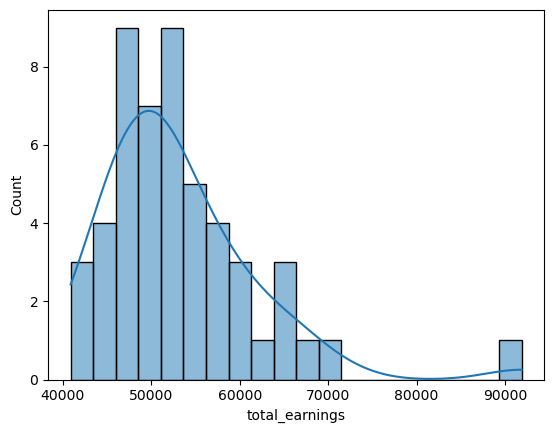

In [44]:
#Check extreme values in earnings data set.
sns.histplot(earn['total_earnings'], bins=20, kde = True)

<Axes: xlabel='no_disability_earnings', ylabel='Count'>

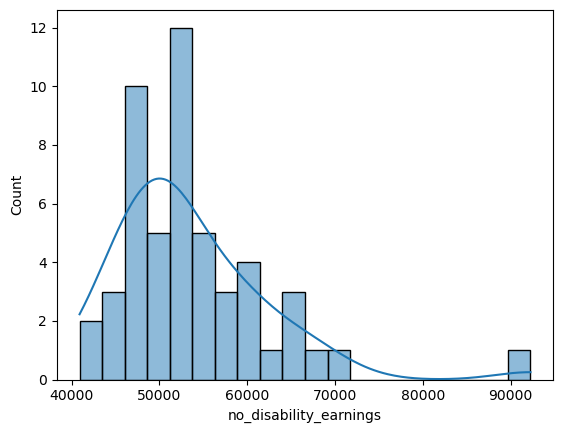

In [45]:
sns.histplot(earn['no_disability_earnings'], bins=20, kde = True)

<Axes: xlabel='disability_earnings', ylabel='Count'>

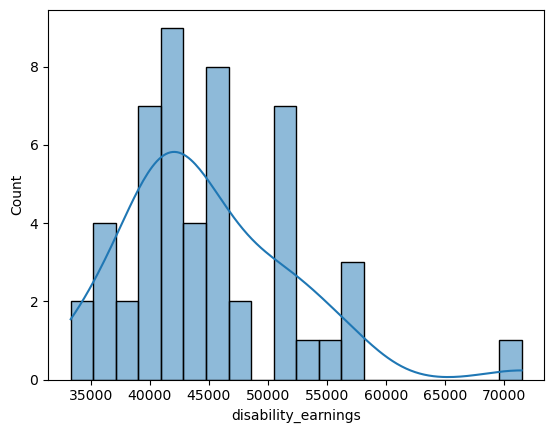

In [46]:
sns.histplot(earn['disability_earnings'], bins=20, kde = True)

<Axes: xlabel='SSDI_allowance_rate', ylabel='Count'>

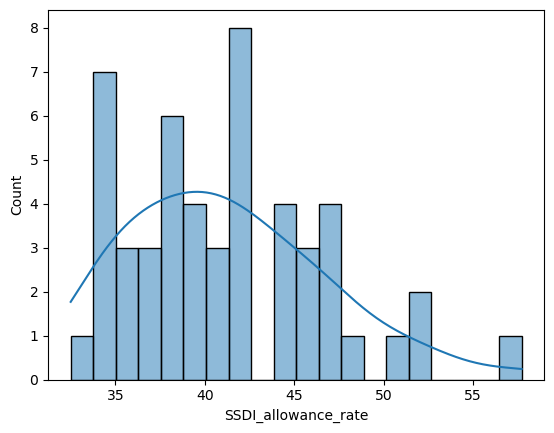

In [47]:
sns.histplot(earn['SSDI_allowance_rate'], bins=20, kde = True)

<Axes: xlabel='min_wage_rate', ylabel='Count'>

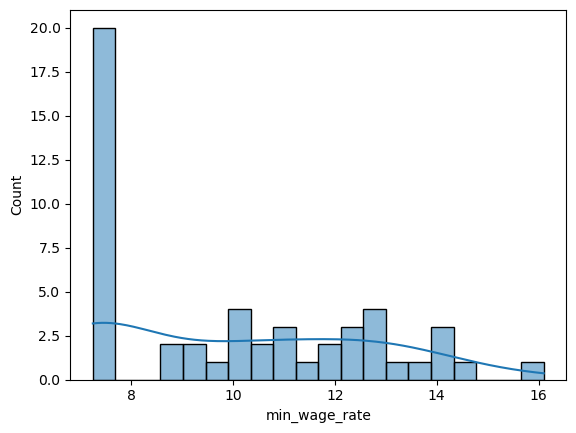

In [48]:
sns.histplot(earn['min_wage_rate'], bins=20, kde = True)

There are no extreme values that stick out in these graphs.

## 4. Plotting a choropleth

In [49]:
# Create a data frame with just the states and the values wanting to be plotted
tp_plot = prev2[['state', 'total_pop']]
tp_plot.head()

state  total_pop
1    AL    4956828
2    AK     703612
3    AZ    7175530
4    AR    2975548
5    CA   38725651

In [50]:
# Setup a folium map at a high-level zoom
tp_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = tp_plot,
    columns = ['state', 'total_pop'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(tp_map)
folium.LayerControl().add_to(tp_map)

tp_map

California has the highest population followed by Texas, New York, and Florida.

In [51]:
# Create a data frame with just the states and the values wanting to be plotted
dc_plot = prev2[['state', 'disability_count']]
dc_plot.head()

state  disability_count
1    AL          805849.0
2    AK           99194.0
3    AZ          970430.0
4    AR          517723.0
5    CA         4342499.0

In [52]:
# Setup a folium map at a high-level zoom
dc_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = dc_plot,
    columns = ['state', 'disability_count'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "disability count").add_to(dc_map)
folium.LayerControl().add_to(dc_map)

dc_map

California has the highest prevalence of people with disabilities followed by New York, Texas, and Florida. It is similar to the map for total population.

In [53]:
# Create a data frame with just the states and the values wanting to be plotted
eg_plot = employ[['state', 'employment_gap']]
eg_plot.head()

state  employment_gap
0    AL            42.3
1    AK            28.8
2    AZ            31.9
3    AR            41.5
4    CA            34.1

In [54]:
# Setup a folium map at a high-level zoom
eg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = eg_plot,
    columns = ['state', 'employment_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "percentage").add_to(eg_map)
folium.LayerControl().add_to(eg_map)

eg_map

The biggest gap in employment between disabled people and non-disabled people occur in Maine, New Hampshire, Kentucky, and Alabama.
The smallest gap in employment between disabled people and non-disabled people occur in Utah, Wyoming, Alaska, and Delaware. 

In [55]:
# Create a data frame with just the states and the values wanting to be plotted
pg_plot = employ[['state', 'poverty_gap']]
pg_plot.head()

state  poverty_gap
0    AL         13.1
1    AK         14.9
2    AZ          9.9
3    AR         13.7
4    CA         11.2

In [56]:
# Setup a folium map at a high-level zoom
pg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = pg_plot,
    columns = ['state', 'poverty_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "percentage").add_to(pg_map)
folium.LayerControl().add_to(pg_map)

pg_map

The highest gap in poverty between disabled and non-disabled people is in New Hampshire followed by North Dakota, Iowa, Kentucky, Maine, and Alaska.
The smallest gap in poverty between disabled and non-disabled people is in Arizona and Delaware.

In [57]:
# Create a data frame with just the states and the values wanting to be plotted
ea_plot = earn[['state', 'earnings_gap']]
ea_plot.head()

state  earnings_gap
0    AL        4012.0
1    AK        5434.0
2    AZ        8162.0
3    AR        7504.0
4    CA        9543.0

In [58]:
# Setup a folium map at a high-level zoom
ea_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = ea_plot,
    columns = ['state', 'earnings_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "number of people").add_to(ea_map)
folium.LayerControl().add_to(ea_map)

ea_map

The biggest earnings gap between disabled people and non-disabled people is in Wyoming followed up by Washington, Massachusetts, and Connecticut. 
The smallest earnings gap between disabled people and non-disabled people is in Hawaii. 

In [59]:
# Create a data frame with just the states and the values wanting to be plotted
mw_plot = earn[['state', 'min_wage_rate']]
mw_plot.head()

state  min_wage_rate
0    AL           7.25
1    AK          10.34
2    AZ          12.80
3    AR          11.00
4    CA          14.00

In [60]:
# Setup a folium map at a high-level zoom
mw_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = mw_plot,
    columns = ['state', 'min_wage_rate'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "dollars").add_to(mw_map)
folium.LayerControl().add_to(mw_map)

mw_map

The highest minimum wage is in Washington, Oregon, California, New York, Massachusetts, and Connecticut.
The lowest minimum wage is in Idaho, Wyoming, Utah, North Dakota, Kansas, Oklahoma, Texas, Louisiana, Iowa, Wisconsin, Indiana, Kentucky, Tennessee, Mississippi, Alabama, Georgia, South Carolina, North Carolina, Pennsylvania, and Vermont. 

## 5. Questions

#### Questions from 6.1

1. What is the prevalence of disabilities across states?

- California, New York, Texas, and Florida have the most people with disabilities. These are also the states with the highest total populations.

2. Are there any states with bigger gaps in employment, poverty, and earnings?
- The biggest gap in employment between disabled people and non-disabled people occur in Maine, New Hampshire, Kentucky, and Alabama.
- The highest gap in poverty between disabled and non-disabled people is in New Hampshire followed by North Dakota, Iowa, Kentucky, Maine, and Alaska. 
- The biggest earnings gap between disabled people and non-disabled people is in Wyoming followed up by Washington, Massachusetts, and Connecticut.

#### Additional Questions that Have Arised

- Are there connections to why certain states have the biggest and smallest gaps in employment, poverty and earnings? (i.e. Is it related to wage? Total population? Type of population? Services provided?)
- Delaware has one of the lowest gaps in employment, poverty, and earnings. Is there anything they are doing differently that the gap is so low in all three areas?

## 6. Extra Visuals

In [69]:
prev3 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'disability prevalence 3.csv'))

In [70]:
# Create a data frame with just the states and the values wanting to be plotted
tp_plot2 = prev3[['state', 'total_pop']]
tp_plot2.head()

state  total_pop
0    AL    4956828
1    AK     703612
2    AZ    7175530
3    AR    2975548
4    CA   38725651

In [71]:
# Setup a folium map at a high-level zoom
tp_map2 = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = tp_plot2,
    columns = ['state', 'total_pop'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(tp_map2)
folium.LayerControl().add_to(tp_map2)

tp_map2

- Redid total population map that includes more accurate numbers.

In [72]:
# Create a data frame with just the states and the values wanting to be plotted
dh_plot = prev3[['state', 'hearing']]
dh_plot.head()

state  hearing
0    AL      4.2
1    AK      4.7
2    AZ      4.2
3    AR      4.8
4    CA      2.9

In [73]:
# Setup a folium map at a high-level zoom
dh_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = dh_plot,
    columns = ['state', 'hearing'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(dh_map)
folium.LayerControl().add_to(dh_map)

dh_map

- The highest percentage of people with hearing disabilities live in West Virginia, Montana, Wyoming, Utah, and Oklahoma.

In [74]:
# Create a data frame with just the states and the values wanting to be plotted
dv_plot = prev3[['state', 'vision']]
dv_plot.head()

state  vision
0    AL     3.1
1    AK     2.5
2    AZ     2.5
3    AR     3.6
4    CA     2.2

In [75]:
# Setup a folium map at a high-level zoom
dv_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = dv_plot,
    columns = ['state', 'vision'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(dv_map)
folium.LayerControl().add_to(dv_map)

dv_map

- The highest percentage of people with vision disabilities are in Mississippi and Oklahoma.

In [76]:
# Create a data frame with just the states and the values wanting to be plotted
dc_plot = prev3[['state', 'cognitive']]
dc_plot.head()

state  cognitive
0    AL        6.1
1    AK        5.6
2    AZ        5.2
3    AR        6.9
4    CA        4.4

In [77]:
# Setup a folium map at a high-level zoom
dc_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = dc_plot,
    columns = ['state', 'cognitive'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(dc_map)
folium.LayerControl().add_to(dc_map)

dc_map

- The highest percentage of people with cognitive disabilities are in West Virginia, Kentucky, Arkansas, and Mississippi

In [78]:
# Create a data frame with just the states and the values wanting to be plotted
dsc_plot = prev3[['state', 'self-care']]
dsc_plot.head()

state  self-care
0    AL        2.8
1    AK        1.9
2    AZ        2.2
3    AR        3.2
4    CA        2.5

In [79]:
# Setup a folium map at a high-level zoom
dsc_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = dsc_plot,
    columns = ['state', 'self-care'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(dsc_map)
folium.LayerControl().add_to(dsc_map)

dsc_map

- The highest percentage of people with self-care disabilities are in West Virginia.

In [80]:
# Create a data frame with just the states and the values wanting to be plotted
dil_plot = prev3[['state', 'independent_living']]
dil_plot.head()

state  independent_living
0    AL                 5.7
1    AK                 4.1
2    AZ                 4.4
3    AR                 6.1
4    CA                 4.5

In [81]:
# Setup a folium map at a high-level zoom
dil_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = dil_plot,
    columns = ['state', 'independent_living'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(dil_map)
folium.LayerControl().add_to(dil_map)

dil_map

- The highest percentage of people with independent living disabilities are in West Virginia, Kentucky, and Mississippi.

In [82]:
# Create a data frame with just the states and the values wanting to be plotted
rw_plot = prev3[['state', 'white']]
rw_plot.head()

state  white
0    AL   16.6
1    AK   14.4
2    AZ   15.6
3    AR   18.7
4    CA   13.8

In [83]:
# Setup a folium map at a high-level zoom
rw_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = rw_plot,
    columns = ['state', 'white'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(rw_map)
folium.LayerControl().add_to(rw_map)

rw_map

- The highest percentage of white people with disabilities are in West Virginia, Kentucky, Mississippi, Arkansas, Oklahoma, and New Mexico.

In [84]:
# Create a data frame with just the states and the values wanting to be plotted
rb_plot = prev3[['state', 'black']]
rb_plot.head()

state  black
0    AL   17.0
1    AK   28.6
2    AZ   13.1
3    AR   18.1
4    CA   16.3

In [85]:
# Setup a folium map at a high-level zoom
rb_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = rb_plot,
    columns = ['state', 'black'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(rb_map)
folium.LayerControl().add_to(rb_map)

rb_map

- The highest percentage of black people with disabilities is in Alaska, followed by Hawaii, and then West Virginia and Arkansas.

In [86]:
# Create a data frame with just the states and the values wanting to be plotted
ra_plot = prev3[['state', 'asian']]
ra_plot.head()

state  asian
0    AL    6.0
1    AK    5.3
2    AZ    8.0
3    AR    6.3
4    CA    8.7

In [87]:
# Setup a folium map at a high-level zoom
ra_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = ra_plot,
    columns = ['state', 'asian'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(ra_map)
folium.LayerControl().add_to(ra_map)

ra_map

- The highest percentage of asian people with disabilities is in Maine, followed by Hawaii, then South Carolina, New Mexico, and Nevada.

In [88]:
# Create a data frame with just the states and the values wanting to be plotted
ro_plot = prev3[['state', 'other']]
ro_plot.head()

state  other
0    AL   19.5
1    AK   14.4
2    AZ   13.3
3    AR   17.8
4    CA   11.5

In [89]:
# Setup a folium map at a high-level zoom
ro_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = ro_plot,
    columns = ['state', 'other'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(ro_map)
folium.LayerControl().add_to(ro_map)

ro_map

- The highest percentage of people whose race is recorded as "other" in the data are in West Virginia, Kentucky, Alabama, Mississippi, and Louisiana.

In [90]:
# Create a data frame with just the states and the values wanting to be plotted
rh_plot = prev3[['state', 'hispanic']]
rh_plot.head()

state  hispanic
0    AL       8.2
1    AK      13.5
2    AZ      10.8
3    AR       6.8
4    CA       9.3

In [91]:
# Setup a folium map at a high-level zoom
rh_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = rh_plot,
    columns = ['state', 'hispanic'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(rh_map)
folium.LayerControl().add_to(rh_map)

rh_map

- The highest percentage of hispanic people with disabilities are in Maine, Pennsylvania, South Dakota, and New Mexico. 

In [92]:
# Create a data frame with just the states and the values wanting to be plotted
gm_plot = prev3[['state', 'male']]
gm_plot.head()

state  male
0    AL  16.1
1    AK  14.1
2    AZ  13.5
3    AR  17.5
4    CA  10.8

In [93]:
# Setup a folium map at a high-level zoom
gm_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = gm_plot,
    columns = ['state', 'male'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(gm_map)
folium.LayerControl().add_to(gm_map)

gm_map

- The highest percentage of males with disabilities are in West Virginia, Kentucky, Mississippi, and Arkansas.

In [94]:
# Create a data frame with just the states and the values wanting to be plotted
gf_plot = prev3[['state', 'female']]
gf_plot.head()

state  female
0    AL    16.4
1    AK    14.1
2    AZ    13.6
3    AR    17.3
4    CA    11.6

In [95]:
# Setup a folium map at a high-level zoom
gf_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = gf_plot,
    columns = ['state', 'female'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(gf_map)
folium.LayerControl().add_to(gf_map)

gf_map

- The highest percentage of females with disabilities are in West Virginia, Kentucky, Mississippi, and Oklahoma. 

In [96]:
# Create a data frame with just the states and the values wanting to be plotted
ab_plot = prev3[['state', 'under_5']]
ab_plot.head()

state  under_5
0    AL      0.6
1    AK      0.1
2    AZ      1.3
3    AR      2.1
4    CA      0.6

In [97]:
# Setup a folium map at a high-level zoom
ab_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = ab_plot,
    columns = ['state', 'under_5'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(ab_map)
folium.LayerControl().add_to(ab_map)

ab_map

- The highest percentage of children under 5 with disabilities are in Wyoming and Arkansas.

In [99]:
# Create a data frame with just the states and the values wanting to be plotted
ac_plot = prev3[['state', '17-May']]
ac_plot.head()

state  17-May
0    AL     5.9
1    AK     6.7
2    AZ     6.5
3    AR     8.4
4    CA     4.9

In [100]:
# Setup a folium map at a high-level zoom
ac_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = ac_plot,
    columns = ['state', '17-May'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(ac_map)
folium.LayerControl().add_to(ac_map)

ac_map

- The highest percentage of children age 5-17 with disabilities are in Rhode Island, Pennsylvania, Kentucky, Mississippi, Arkansas, and Oklahoma.

In [101]:
# Create a data frame with just the states and the values wanting to be plotted
aa_plot = prev3[['state', '18-64']]
aa_plot.head()

state  18-64
0    AL   14.4
1    AK   13.4
2    AZ   10.9
3    AR   15.3
4    CA    8.7

In [102]:
# Setup a folium map at a high-level zoom
aa_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = aa_plot,
    columns = ['state', '18-64'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(aa_map)
folium.LayerControl().add_to(aa_map)

aa_map

- The highest percentage of adults with disabilities are in West Virginia, Kentucky, Mississippi, Arkansas, and Oklahoma.

In [103]:
# Create a data frame with just the states and the values wanting to be plotted
as_plot = prev3[['state', '65+']]
as_plot.head()

state   65+
0    AL  38.0
1    AK  33.8
2    AZ  32.0
3    AR  39.0
4    CA  32.6

In [104]:
# Setup a folium map at a high-level zoom
as_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = as_plot,
    columns = ['state', '65+'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(as_map)
folium.LayerControl().add_to(as_map)

as_map

- The highest percentage of people over 65 years old with disabilities are in Kentucky, Mississippi, Arkansas, and Oklahoma.

In [131]:
#import employment & poverty data aligned in a different way
employ2 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'employment & poverty 2.csv'))

In [106]:
employ2.columns

Index(['state', 'total_pop', 'hearing_employ', 'hearing_poverty',
       'vision_employ', 'vision_poverty', 'cognitive_employ',
       'cognitive_poverty', 'ambulatory_employ', 'ambulatory_poverty',
       'self-care_employ', 'self-care_poverty', 'independent_living_employ',
       'independent_living_poverty', 'white_employ', 'white_poverty',
       'white_e_gap', 'white_p_gap', 'black_employ', 'black_poverty',
       'black_e_gap', 'black_p_gap', 'asian_employ', 'asian_poverty',
       'asian_e_gap', 'asian_p_gap', 'other_employ', 'other_poverty',
       'other_e_gap', 'other_p_gap', 'hispanic_employ', 'hispanic_poverty',
       'hispanic_e_gap', 'hispanic_p_gap', 'male_employ', 'male_poverty',
       'male_e_gap', 'male_p_gap', 'female_employ', 'female_poverty',
       'female_e_gap', 'female_p_gap'],
      dtype='object')

In [108]:
# Create a data frame with just the states and the values wanting to be plotted
he_plot = employ2[['state', 'hearing_employ']]
he_plot.head()

state  hearing_employ
0    AL            52.2
1    AK            52.5
2    AZ            54.7
3    AR            52.7
4    CA            52.2

In [109]:
# Setup a folium map at a high-level zoom
he_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = he_plot,
    columns = ['state', 'hearing_employ'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(he_map)
folium.LayerControl().add_to(he_map)

he_map

- The highest percentage of people with hearing disabilities employed are in North Dakota, Nebraska, and Utah.

In [110]:
# Create a data frame with just the states and the values wanting to be plotted
hp_plot = employ2[['state', 'hearing_poverty']]
hp_plot.head()

state  hearing_poverty
0    AL             16.3
1    AK             17.5
2    AZ             14.6
3    AR             17.9
4    CA             15.0

In [111]:
# Setup a folium map at a high-level zoom
hp_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = hp_plot,
    columns = ['state', 'hearing_poverty'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(hp_map)
folium.LayerControl().add_to(hp_map)

hp_map

- The highest percentage of people with hearing disabilities in poverty are in Vermont, West Virginia, Kentucky, Mississippi, Louisiana, Arkansas, New Mexico, and Alaska.

In [112]:
# Create a data frame with just the states and the values wanting to be plotted
ve_plot = employ2[['state', 'vision_employ']]
ve_plot.head()

state  vision_employ
0    AL           36.6
1    AK           58.3
2    AZ           57.0
3    AR           39.4
4    CA           47.9

In [113]:
# Setup a folium map at a high-level zoom
ve_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = ve_plot,
    columns = ['state', 'vision_employ'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(ve_map)
folium.LayerControl().add_to(ve_map)

ve_map

- The highest percentage of people with vision disabilities employed are in North Dakota and Idaho.

In [114]:
# Create a data frame with just the states and the values wanting to be plotted
vp_plot = employ2[['state', 'vision_poverty']]
vp_plot.head()

state  vision_poverty
0    AL            23.2
1    AK            24.0
2    AZ            18.5
3    AR            27.5
4    CA            20.1

In [115]:
# Setup a folium map at a high-level zoom
vp_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = vp_plot,
    columns = ['state', 'vision_poverty'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(vp_map)
folium.LayerControl().add_to(vp_map)

vp_map

- The highest percentage of people with vision disabilities in poverty are in Maine, Kentucky, Mississippi, Louisiana, Arkansas, South Dakota, and New Mexico. 

In [116]:
# Create a data frame with just the states and the values wanting to be plotted
ce_plot = employ2[['state', 'cognitive_employ']]
ce_plot.head()

state  cognitive_employ
0    AL              26.6
1    AK              46.6
2    AZ              36.6
3    AR              26.3
4    CA              31.8

In [117]:
# Setup a folium map at a high-level zoom
ce_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = ce_plot,
    columns = ['state', 'cognitive_employ'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(ce_map)
folium.LayerControl().add_to(ce_map)

ce_map

- The highest percentage of people with cognitive disabilities employed are in North Dakota and Utah.

In [118]:
# Create a data frame with just the states and the values wanting to be plotted
cp_plot = employ2[['state', 'cognitive_poverty']]
cp_plot.head()

state  cognitive_poverty
0    AL               26.4
1    AK               24.7
2    AZ               22.7
3    AR               28.4
4    CA               23.6

In [119]:
# Setup a folium map at a high-level zoom
cp_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = cp_plot,
    columns = ['state', 'cognitive_poverty'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(cp_map)
folium.LayerControl().add_to(cp_map)

cp_map

- The highest percentage of people with cognitive disabilities in poverty are in Maine, followed by Kentucky, Louisiana, Iowa, and South Dakota.

In [120]:
# Create a data frame with just the states and the values wanting to be plotted
ae_plot = employ2[['state', 'ambulatory_employ']]
ae_plot.head()

state  ambulatory_employ
0    AL               19.0
1    AK               32.0
2    AZ               29.8
3    AR               24.6
4    CA               25.0

In [121]:
# Setup a folium map at a high-level zoom
ae_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = ae_plot,
    columns = ['state', 'ambulatory_employ'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(ae_map)
folium.LayerControl().add_to(ae_map)

ae_map

- The highest percentage of people with ambulatory disabilities employed are in Utah followed by Delaware, Minnesota, North Dakota, Nebraska, Montana, and Wyoming.

In [123]:
# Create a data frame with just the states and the values wanting to be plotted
ap_plot = employ2[['state', 'ambulatory_poverty']]
ap_plot.head()

state  ambulatory_poverty
0    AL                23.1
1    AK                22.0
2    AZ                19.2
3    AR                24.5
4    CA                19.8

In [124]:
# Setup a folium map at a high-level zoom
ap_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = ap_plot,
    columns = ['state', 'ambulatory_poverty'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(ap_map)
folium.LayerControl().add_to(ap_map)

ap_map

- The highest percentage of people with ambulatory disabilities in poverty are in New Mexico followed by Maine, Vermont, New York, West Virginia, Kentucky, Mississippi, Louisiana, Arkansas, and South Dakota.

In [125]:
# Create a data frame with just the states and the values wanting to be plotted
sce_plot = employ2[['state', 'self-care_employ']]
sce_plot.head()

state  self-care_employ
0    AL              11.3
1    AK              27.5
2    AZ              18.0
3    AR              13.4
4    CA              13.2

In [126]:
# Setup a folium map at a high-level zoom
sce_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = sce_plot,
    columns = ['state', 'self-care_employ'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(sce_map)
folium.LayerControl().add_to(sce_map)

sce_map

- The highest percentage of people with self-care disabilities employed are in Minnesota, North Dakota, and Alaska.

In [127]:
# Create a data frame with just the states and the values wanting to be plotted
scp_plot = employ2[['state', 'self-care_poverty']]
scp_plot.head()

state  self-care_poverty
0    AL               22.8
1    AK               25.1
2    AZ               18.9
3    AR               28.2
4    CA               22.5

In [128]:
# Setup a folium map at a high-level zoom
scp_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = scp_plot,
    columns = ['state', 'self-care_poverty'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(scp_map)
folium.LayerControl().add_to(scp_map)

scp_map

- The highest percentage of people with self-care disabilities in poverty are in West Virginia followed by Maine.

In [132]:
# Create a data frame with just the states and the values wanting to be plotted
ile_plot = employ2[['state', 'independent_living_employ']]
ile_plot.head()

state  independent_living_employ
0    AL                       13.8
1    AK                       21.5
2    AZ                       23.4
3    AR                       14.8
4    CA                       19.1

In [133]:
# Setup a folium map at a high-level zoom
ile_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = ile_plot,
    columns = ['state', 'independent_living_employ'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(ile_map)
folium.LayerControl().add_to(ile_map)

ile_map

- The highest percentage of people with independent living disabilities employed are in Minnesota and Nebraska.

In [134]:
# Create a data frame with just the states and the values wanting to be plotted
ilp_plot = employ2[['state', 'independent_living_poverty']]
ilp_plot.head()

state  independent_living_poverty
0    AL                        23.1
1    AK                        25.3
2    AZ                        19.5
3    AR                        26.6
4    CA                        21.9

In [135]:
# Setup a folium map at a high-level zoom
ilp_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = ilp_plot,
    columns = ['state', 'independent_living_poverty'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(ilp_map)
folium.LayerControl().add_to(ilp_map)

ilp_map

- The highest percentage of people with independent living disabilities in poverty are in Maine and South Dakota. 

In [136]:
# Create a data frame with just the states and the values wanting to be plotted
we_plot = employ2[['state', 'white_employ']]
we_plot.head()

state  white_employ
0    AL          34.1
1    AK          44.2
2    AZ          44.4
3    AR          36.0
4    CA          38.9

In [137]:
# Setup a folium map at a high-level zoom
we_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = we_plot,
    columns = ['state', 'white_employ'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(we_map)
folium.LayerControl().add_to(we_map)

we_map

- The highest percentage of white people with disabilities employed is in North and South Dakota.

In [138]:
# Create a data frame with just the states and the values wanting to be plotted
wp_plot = employ2[['state', 'white_poverty']]
wp_plot.head()

state  white_poverty
0    AL           18.7
1    AK           16.0
2    AZ           15.0
3    AR           21.1
4    CA           16.6

In [139]:
# Setup a folium map at a high-level zoom
wp_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = wp_plot,
    columns = ['state', 'white_poverty'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(wp_map)
folium.LayerControl().add_to(wp_map)

wp_map

- The highest percentage of white disabled people in poverty are in Maine, West Virginia, and Kentucky.

In [140]:
# Create a data frame with just the states and the values wanting to be plotted
weg_plot = employ2[['state', 'white_e_gap']]
weg_plot.head()

state  white_e_gap
0    AL         41.9
1    AK         33.4
2    AZ         33.1
3    AR         41.6
4    CA         36.4

In [141]:
# Setup a folium map at a high-level zoom
weg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = weg_plot,
    columns = ['state', 'white_e_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(weg_map)
folium.LayerControl().add_to(weg_map)

weg_map

- The biggest gap in employment between white disabled people and white non-disabled people are in Maine, Vermont, West Virginia, Kentucky, Tenessee, Alabama, Mississippi, and Arkansas.

In [142]:
# Create a data frame with just the states and the values wanting to be plotted
wpg_plot = employ2[['state', 'white_p_gap']]
wpg_plot.head()

state  white_p_gap
0    AL          7.4
1    AK          8.9
2    AZ          6.1
3    AR          7.6
4    CA          8.3

In [143]:
# Setup a folium map at a high-level zoom
wpg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = wpg_plot,
    columns = ['state', 'white_p_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(wpg_map)
folium.LayerControl().add_to(wpg_map)

wpg_map

- The biggest gap in poverty between white disabled people and non-disabled people are in Maine and Vermont.

In [145]:
# Create a data frame with just the states and the values wanting to be plotted
be_plot = employ2[['state', 'black_employ']]
be_plot.head()

state  black_employ
0    AL          26.0
1    AK          27.4
2    AZ          43.8
3    AR          30.1
4    CA          31.8

In [146]:
# Setup a folium map at a high-level zoom
be_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = be_plot,
    columns = ['state', 'black_employ'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(be_map)
folium.LayerControl().add_to(be_map)

be_map

- The highest percentage of black disabled people employed are in Vermont and New Hampshire. 

In [147]:
# Create a data frame with just the states and the values wanting to be plotted
bp_plot = employ2[['state', 'black_poverty']]
bp_plot.head()

state  black_poverty
0    AL           30.6
1    AK           37.4
2    AZ           22.0
3    AR           32.9
4    CA           29.0

In [148]:
# Setup a folium map at a high-level zoom
bp_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = bp_plot,
    columns = ['state', 'black_poverty'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(bp_map)
folium.LayerControl().add_to(bp_map)

bp_map

- The highest percentage of black disabled people in poverty are in West Virginia, Wisconsin, Iowa, and Kansas.

In [149]:
# Create a data frame with just the states and the values wanting to be plotted
beg_plot = employ2[['state', 'black_e_gap']]
beg_plot.head()

state  black_e_gap
0    AL         45.3
1    AK         47.4
2    AZ         34.1
3    AR         43.4
4    CA         37.3

In [150]:
# Setup a folium map at a high-level zoom
beg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = beg_plot,
    columns = ['state', 'black_e_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(beg_map)
folium.LayerControl().add_to(beg_map)

beg_map

- The biggest gap in employment between black disabled and non-disabled people are in Montana and Idaho.

In [151]:
# Create a data frame with just the states and the values wanting to be plotted
bpg_plot = employ2[['state', 'black_p_gap']]
bpg_plot.head()

state  black_p_gap
0    AL          5.8
1    AK         14.3
2    AZ          3.6
3    AR          5.4
4    CA          9.9

In [152]:
# Setup a folium map at a high-level zoom
bpg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = bpg_plot,
    columns = ['state', 'black_p_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(bpg_map)
folium.LayerControl().add_to(bpg_map)

bpg_map

- The highest gap in poverty between black disabled and non-disabled people are in Massachusetts, Pennsylvania, West Virginia, Wisconsin, Minnesota, Iowa, South Dakota, Kansas, and Alaska. 

In [153]:
# Create a data frame with just the states and the values wanting to be plotted
ase_plot = employ2[['state', 'asian_employ']]
ase_plot.head()

state  asian_employ
0    AL          53.7
1    AK          71.3
2    AZ          49.1
3    AR          37.3
4    CA          40.4

In [154]:
# Setup a folium map at a high-level zoom
ase_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = ase_plot,
    columns = ['state', 'asian_employ'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(ase_map)
folium.LayerControl().add_to(ase_map)

ase_map

- The highest percentage of asian disabled people employed are in Mississippi and South Dakota.

In [155]:
# Create a data frame with just the states and the values wanting to be plotted
asp_plot = employ2[['state', 'asian_poverty']]
asp_plot.head()

state  asian_poverty
0    AL           23.7
1    AK           28.5
2    AZ           17.9
3    AR           10.8
4    CA           17.4

In [156]:
# Setup a folium map at a high-level zoom
asp_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = asp_plot,
    columns = ['state', 'asian_poverty'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(asp_map)
folium.LayerControl().add_to(asp_map)

asp_map

- The highest percentage of asian disabled people in poverty is in Vermont, followed by Idaho.

In [157]:
# Create a data frame with just the states and the values wanting to be plotted
aseg_plot = employ2[['state', 'asian_e_gap']]
aseg_plot.head()

state  asian_e_gap
0    AL         23.1
1    AK          0.9
2    AZ         28.8
3    AR         39.6
4    CA         33.2

In [158]:
# Setup a folium map at a high-level zoom
aseg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = aseg_plot,
    columns = ['state', 'asian_e_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(aseg_map)
folium.LayerControl().add_to(aseg_map)

aseg_map

- The biggest gap in employment between asian disabled and non-disabled people are in Rhode Island, Wisconsin, Nebraska, and Idaho.

In [159]:
# Create a data frame with just the states and the values wanting to be plotted
aspg_plot = employ2[['state', 'asian_p_gap']]
aspg_plot.head()

state  asian_p_gap
0    AL         12.8
1    AK         23.2
2    AZ          6.7
3    AR          0.8
4    CA          6.9

In [160]:
# Setup a folium map at a high-level zoom
aspg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = aspg_plot,
    columns = ['state', 'asian_p_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(aspg_map)
folium.LayerControl().add_to(aspg_map)

aspg_map

- The highest gap in poverty for asian disabled and non-disabled people is Vermont followed by Idaho and then Alaska.

In [161]:
# Create a data frame with just the states and the values wanting to be plotted
oe_plot = employ2[['state', 'other_employ']]
oe_plot.head()

state  other_employ
0    AL          37.4
1    AK          40.9
2    AZ          39.3
3    AR          32.0
4    CA          40.0

In [162]:
# Setup a folium map at a high-level zoom
oe_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = oe_plot,
    columns = ['state', 'other_employ'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(oe_map)
folium.LayerControl().add_to(oe_map)

oe_map

- The highest percentage of employment for people whose race is categorized as "other" in this data are in Delaware and Idaho.

In [163]:
# Create a data frame with just the states and the values wanting to be plotted
op_plot = employ2[['state', 'other_poverty']]
op_plot.head()

state  other_poverty
0    AL           25.8
1    AK           27.2
2    AZ           29.4
3    AR           25.7
4    CA           23.4

In [164]:
# Setup a folium map at a high-level zoom
op_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = op_plot,
    columns = ['state', 'other_poverty'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(op_map)
folium.LayerControl().add_to(op_map)

op_map

- The highest percentage of poverty for people who race is categorized as "other" in this data are in Louisiana and South Dakota. 

In [165]:
# Create a data frame with just the states and the values wanting to be plotted
oeg_plot = employ2[['state', 'other_e_gap']]
oeg_plot.head()

state  other_e_gap
0    AL         36.2
1    AK         27.8
2    AZ         28.3
3    AR         44.8
4    CA         32.5

In [166]:
# Setup a folium map at a high-level zoom
oeg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = oeg_plot,
    columns = ['state', 'other_e_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(oeg_map)
folium.LayerControl().add_to(oeg_map)

oeg_map

- The biggest gap in employment for disabled and non-disabled people whose race is categorized as "other" is in Maine followed by West Virginia, Missouri, Arkansas, and Nebraska.

In [167]:
# Create a data frame with just the states and the values wanting to be plotted
opg_plot = employ2[['state', 'other_p_gap']]
opg_plot.head()

state  other_p_gap
0    AL          8.4
1    AK          9.9
2    AZ          8.6
3    AR         10.7
4    CA         10.2

In [168]:
# Setup a folium map at a high-level zoom
opg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = opg_plot,
    columns = ['state', 'other_p_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(opg_map)
folium.LayerControl().add_to(opg_map)

opg_map

- The biggest gap in poverty for disabled and non-disabled people whose race is categorized as "other" is in Maine, followed by Massachusetts, Delaware, Maryland, Kentucky, Missouri, Louisiana, Utah, and Nevada.

In [169]:
# Create a data frame with just the states and the values wanting to be plotted
hie_plot = employ2[['state', 'hispanic_employ']]
hie_plot.head()

state  hispanic_employ
0    AL             50.2
1    AK             77.4
2    AZ             44.7
3    AR             52.1
4    CA             41.3

In [170]:
# Setup a folium map at a high-level zoom
hie_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = hie_plot,
    columns = ['state', 'hispanic_employ'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(hie_map)
folium.LayerControl().add_to(hie_map)

hie_map

- The highest employment percentages for hispanic disabled people are in West Virginia and Alaska.

In [171]:
# Create a data frame with just the states and the values wanting to be plotted
hip_plot = employ2[['state', 'hispanic_poverty']]
hip_plot.head()

state  hispanic_poverty
0    AL              27.1
1    AK              24.4
2    AZ              22.6
3    AR              25.5
4    CA              20.5

In [172]:
# Setup a folium map at a high-level zoom
hip_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = hip_plot,
    columns = ['state', 'hispanic_poverty'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(hip_map)
folium.LayerControl().add_to(hip_map)

hip_map

- The highest percentage of poverty for hispanic disabled people is in Vermont followed by Iowa.

In [173]:
# Create a data frame with just the states and the values wanting to be plotted
hieg_plot = employ2[['state', 'hispanic_e_gap']]
hieg_plot.head()

state  hispanic_e_gap
0    AL            22.0
1    AK            -1.1
2    AZ            30.4
3    AR            24.3
4    CA            31.5

In [174]:
# Setup a folium map at a high-level zoom
hieg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = hieg_plot,
    columns = ['state', 'hispanic_e_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(hieg_map)
folium.LayerControl().add_to(hieg_map)

hieg_map

- The biggest gap in employment between hispanic disabled and non-disabled people is in New Hampshire, Massachusetts, Pennsylvania, and Kansas.

In [175]:
# Create a data frame with just the states and the values wanting to be plotted
hipg_plot = employ2[['state', 'hispanic_p_gap']]
hipg_plot.head()

state  hispanic_p_gap
0    AL             1.8
1    AK            10.0
2    AZ             5.7
3    AR             3.5
4    CA             4.4

In [176]:
# Setup a folium map at a high-level zoom
hipg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = hipg_plot,
    columns = ['state', 'hispanic_p_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(hipg_map)
folium.LayerControl().add_to(hipg_map)

hipg_map

- The biggest gap in poverty for hispanic disabled and non-disabled people is in Vermont followed by Iowa.

In [178]:
# Create a data frame with just the states and the values wanting to be plotted
me_plot = employ2[['state', 'male_employ']]
me_plot.head()

state  male_employ
0    AL         34.5
1    AK         45.0
2    AZ         45.2
3    AR         35.1
4    CA         40.4

In [179]:
# Setup a folium map at a high-level zoom
me_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = me_plot,
    columns = ['state', 'male_employ'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(me_map)
folium.LayerControl().add_to(me_map)

me_map

- The highest percentage of employment for disabled males is in North Dakota followed by Nebraska, Idaho, and Utah.

In [180]:
# Create a data frame with just the states and the values wanting to be plotted
mp_plot = employ2[['state', 'male_poverty']]
mp_plot.head()

state  male_poverty
0    AL          19.6
1    AK          19.8
2    AZ          17.5
3    AR          20.6
4    CA          17.9

In [181]:
# Setup a folium map at a high-level zoom
mp_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = mp_plot,
    columns = ['state', 'male_poverty'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(mp_map)
folium.LayerControl().add_to(mp_map)

mp_map

- The highest percentage of poverty for diabled males is in Maine, Vermont, Kentucky, Louisiana, and New Mexico.

In [182]:
# Create a data frame with just the states and the values wanting to be plotted
meg_plot = employ2[['state', 'male_e_gap']]
meg_plot.head()

state  male_e_gap
0    AL        45.2
1    AK        33.8
2    AZ        36.9
3    AR        46.5
4    CA        39.1

In [183]:
# Setup a folium map at a high-level zoom
meg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = meg_plot,
    columns = ['state', 'male_e_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(meg_map)
folium.LayerControl().add_to(meg_map)

meg_map

- The highest gap in employment between men who are disabled and non-disabled is in Maine, West Virginia, Kentucky, Tennessee, Alabama, Mississippi, and Arkansas. 

In [184]:
# Create a data frame with just the states and the values wanting to be plotted
mpg_plot = employ2[['state', 'male_p_gap']]
mpg_plot.head()

state  male_p_gap
0    AL         5.9
1    AK         8.9
2    AZ         5.8
3    AR         6.1
4    CA         6.6

In [185]:
# Setup a folium map at a high-level zoom
mpg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = mpg_plot,
    columns = ['state', 'male_p_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(mpg_map)
folium.LayerControl().add_to(mpg_map)

mpg_map

- The biggest gap in poverty between men who are diabled and non-disabled is in Maine and Vermont.

In [186]:
# Create a data frame with just the states and the values wanting to be plotted
fe_plot = employ2[['state', 'female_employ']]
fe_plot.head()

state  female_employ
0    AL           30.3
1    AK           47.0
2    AZ           43.0
3    AR           35.4
4    CA           38.4

In [187]:
# Setup a folium map at a high-level zoom
fe_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = fe_plot,
    columns = ['state', 'female_employ'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(fe_map)
folium.LayerControl().add_to(fe_map)

fe_map

- The highest percentage in employment for diabled females is in Minnesota, North Dakota, South Dakota, Wyoming, and Utah. 

In [188]:
# Create a data frame with just the states and the values wanting to be plotted
fp_plot = employ2[['state', 'female_poverty']]
fp_plot.head()

state  female_poverty
0    AL            17.7
1    AK             9.4
2    AZ            14.1
3    AR            17.8
4    CA            13.5

In [189]:
# Setup a folium map at a high-level zoom
fp_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = fp_plot,
    columns = ['state', 'female_poverty'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(fp_map)
folium.LayerControl().add_to(fp_map)

fp_map

- The highest percentage of poverty for disabled females is Mississippi, Louisiana, and New Mexico.

In [190]:
# Create a data frame with just the states and the values wanting to be plotted
feg_plot = employ2[['state', 'female_e_gap']]
feg_plot.head()

state  female_e_gap
0    AL          25.1
1    AK          22.2
2    AZ          19.4
3    AR          25.9
4    CA          20.5

In [191]:
# Setup a folium map at a high-level zoom
feg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = feg_plot,
    columns = ['state', 'female_e_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(feg_map)
folium.LayerControl().add_to(feg_map)

feg_map

- The biggest gap in employment between women who are disabled and not disabled is in West Virginia, Kentucky, and Mississippi.

In [192]:
# Create a data frame with just the states and the values wanting to be plotted
fpg_plot = employ2[['state', 'female_p_gap']]
fpg_plot.head()

state  female_p_gap
0    AL           7.3
1    AK          12.6
2    AZ           4.9
3    AR           8.2
4    CA           7.5

In [193]:
# Setup a folium map at a high-level zoom
fpg_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = fpg_plot,
    columns = ['state', 'female_p_gap'],
    key_on = 'feature.id', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total population").add_to(fpg_map)
folium.LayerControl().add_to(fpg_map)

fpg_map

- The biggest gap in poverty for disabled and non-disabled women is in Vermont followed by Maine, Kentucky, Iowa, North Dakota, and Alaska.